## Data Management with fiftyone

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import fiftyone as fo
import fiftyone.zoo as foz

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Loading datasets form fiftyone zoo

In [2]:
fo.pprint(foz.list_zoo_datasets())

[
    'activitynet-100',
    'activitynet-200',
    'bdd100k',
    'caltech101',
    'caltech256',
    'cifar10',
    'cifar100',
    'cityscapes',
    'coco-2014',
    'coco-2017',
    'fashion-mnist',
    'fiw',
    'hmdb51',
    'imagenet-2012',
    'imagenet-sample',
    'kinetics-400',
    'kinetics-600',
    'kinetics-700',
    'kinetics-700-2020',
    'kitti',
    'kitti-multiview',
    'lfw',
    'mnist',
    'open-images-v6',
    'open-images-v7',
    'quickstart',
    'quickstart-geo',
    'quickstart-groups',
    'quickstart-video',
    'sama-coco',
    'ucf101',
    'voc-2007',
    'voc-2012',
]


In [3]:
# load cifar10
ds = foz.load_zoo_dataset(
    name="cifar10",
    splits=["train", "test"],
    persistent=False,
    max_samples=50
)

fo.pprint(ds.stats())

Split 'train' already downloaded
Split 'test' already downloaded
Loading 'cifar10' split 'train'
 100% |███████████████████| 50/50 [32.4ms elapsed, 0s remaining, 1.5K samples/s]      
Loading 'cifar10' split 'test'
 100% |███████████████████| 50/50 [15.1ms elapsed, 0s remaining, 3.3K samples/s]     
Dataset 'cifar10-train-test-50' created
{
    'samples_count': 100,
    'samples_bytes': 26593,
    'samples_size': '26.0KB',
    'total_bytes': 26593,
    'total_size': '26.0KB',
}


### Exploring samples from a dataset

In [4]:
# first and last samples
first_sample = ds.first()
last_sample = ds.last()

first_sample

<Sample: {
    'id': '6678dea5cd4758d28fa2ba2f',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/fiftyone/cifar10/train/data/000001.jpg',
    'tags': ['train'],
    'metadata': None,
    'ground_truth': <Classification: {
        'id': '6678dea5cd4758d28fa2ba2e',
        'tags': [],
        'label': 'frog',
        'confidence': None,
        'logits': None,
    }>,
}>

In [6]:
first_sample["filepath"]

'/Users/mlstudio/fiftyone/cifar10/train/data/000001.jpg'

In [8]:
samples = ds.head()  # --> a list of the first 10 samples

type(samples), len(samples)

(list, 3)

### Taking a sliced view of the dataset

In [9]:
ds2 = ds.take(10)  # -> a view

print(type(ds2))

ds2

<class 'fiftyone.core.view.DatasetView'>


Dataset:     cifar10-train-test-50
Media type:  image
Num samples: 10
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
View stages:
    1. Take(size=10, seed=None)

### Reading and visualizing the data in Matplotlib

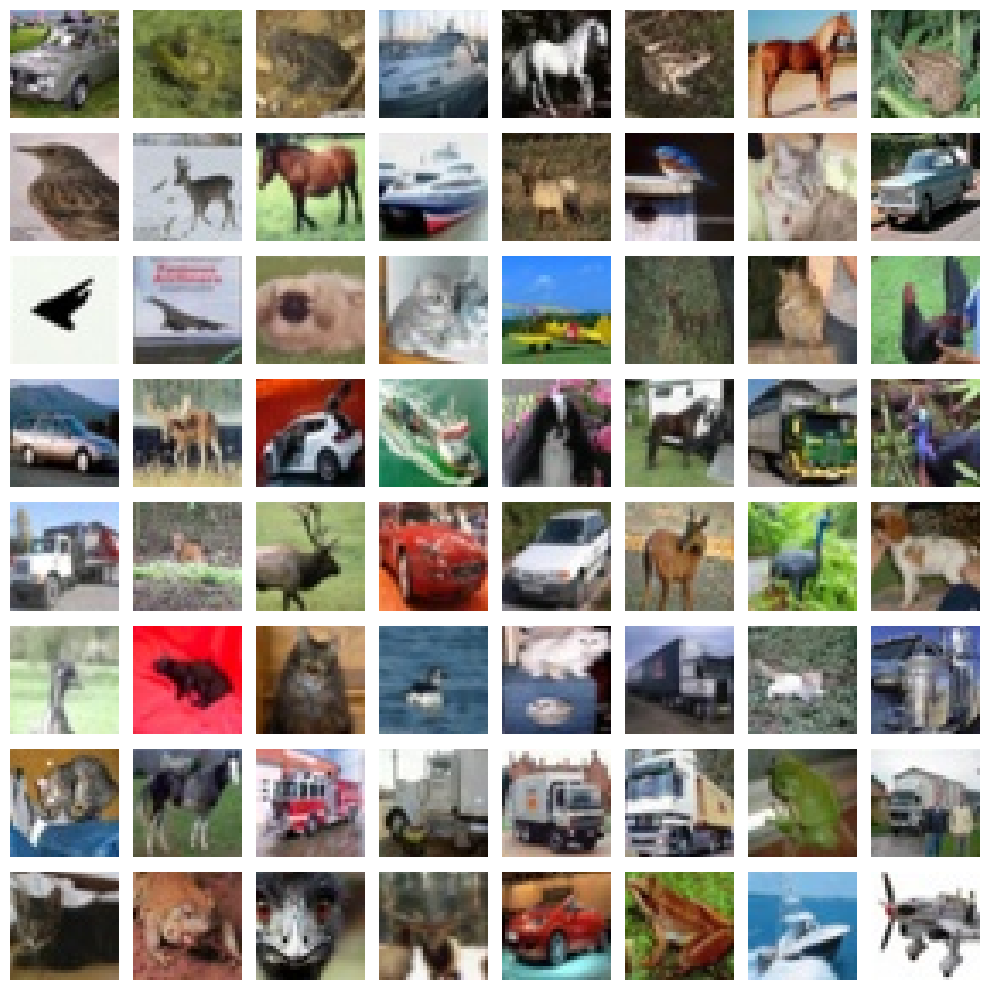

In [11]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))

for i, sample in enumerate(ds.take(64)):
    row, col = i // 8, i % 8
    img = Image.open(sample["filepath"])
    axes[row, col].imshow(img)

[axes[i, j].axis('off') for i in range(8) for j in range(8)]

plt.tight_layout()
plt.show()

### Visualize the data with fiftyone app

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port



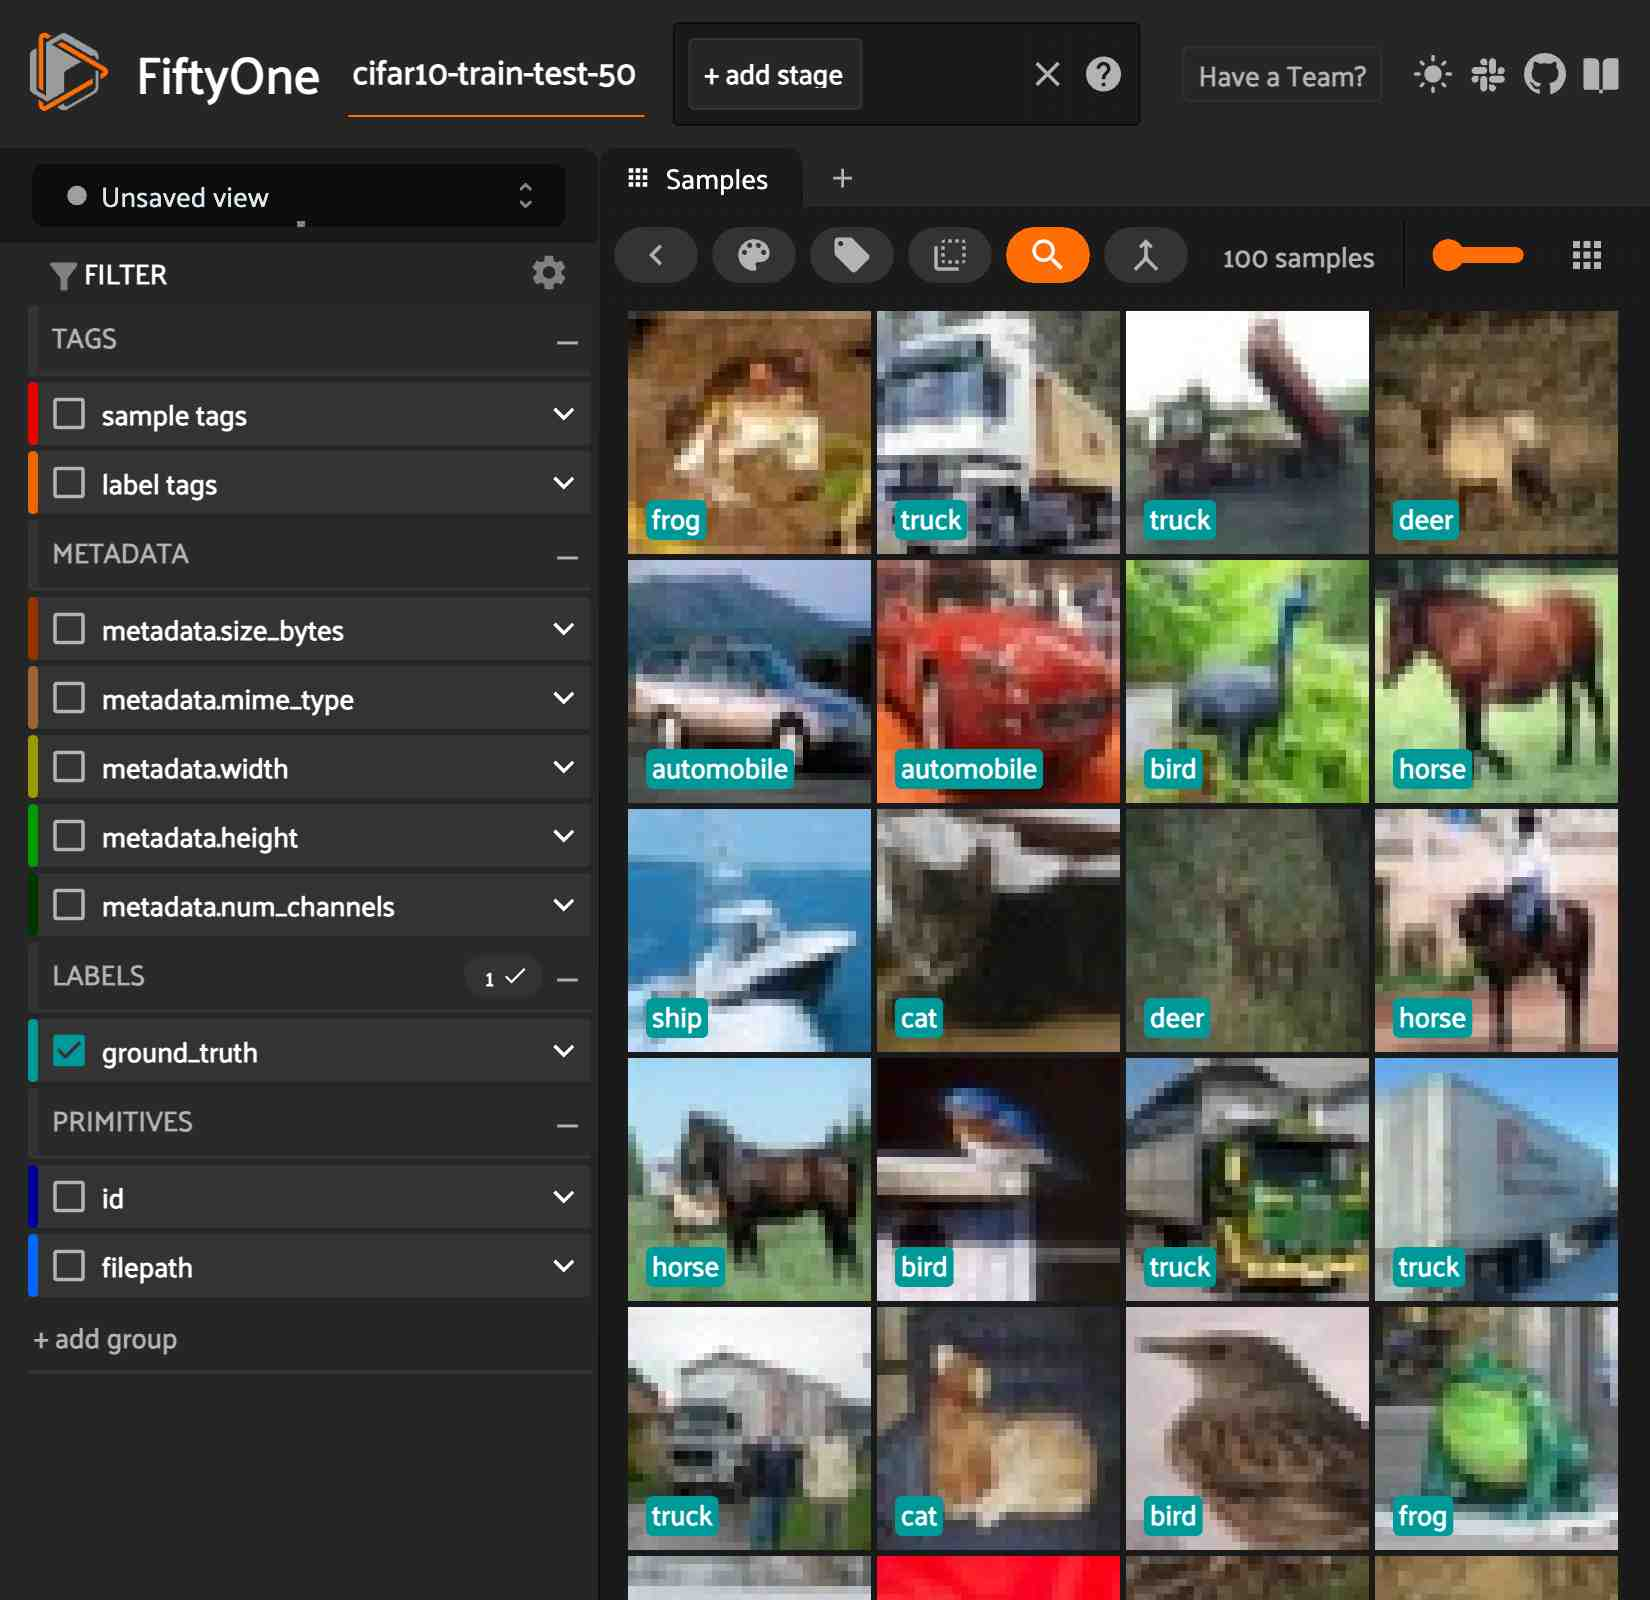

In [13]:
session = fo.launch_app(ds)

# uncomment next line if running as a script:
#session.wait()


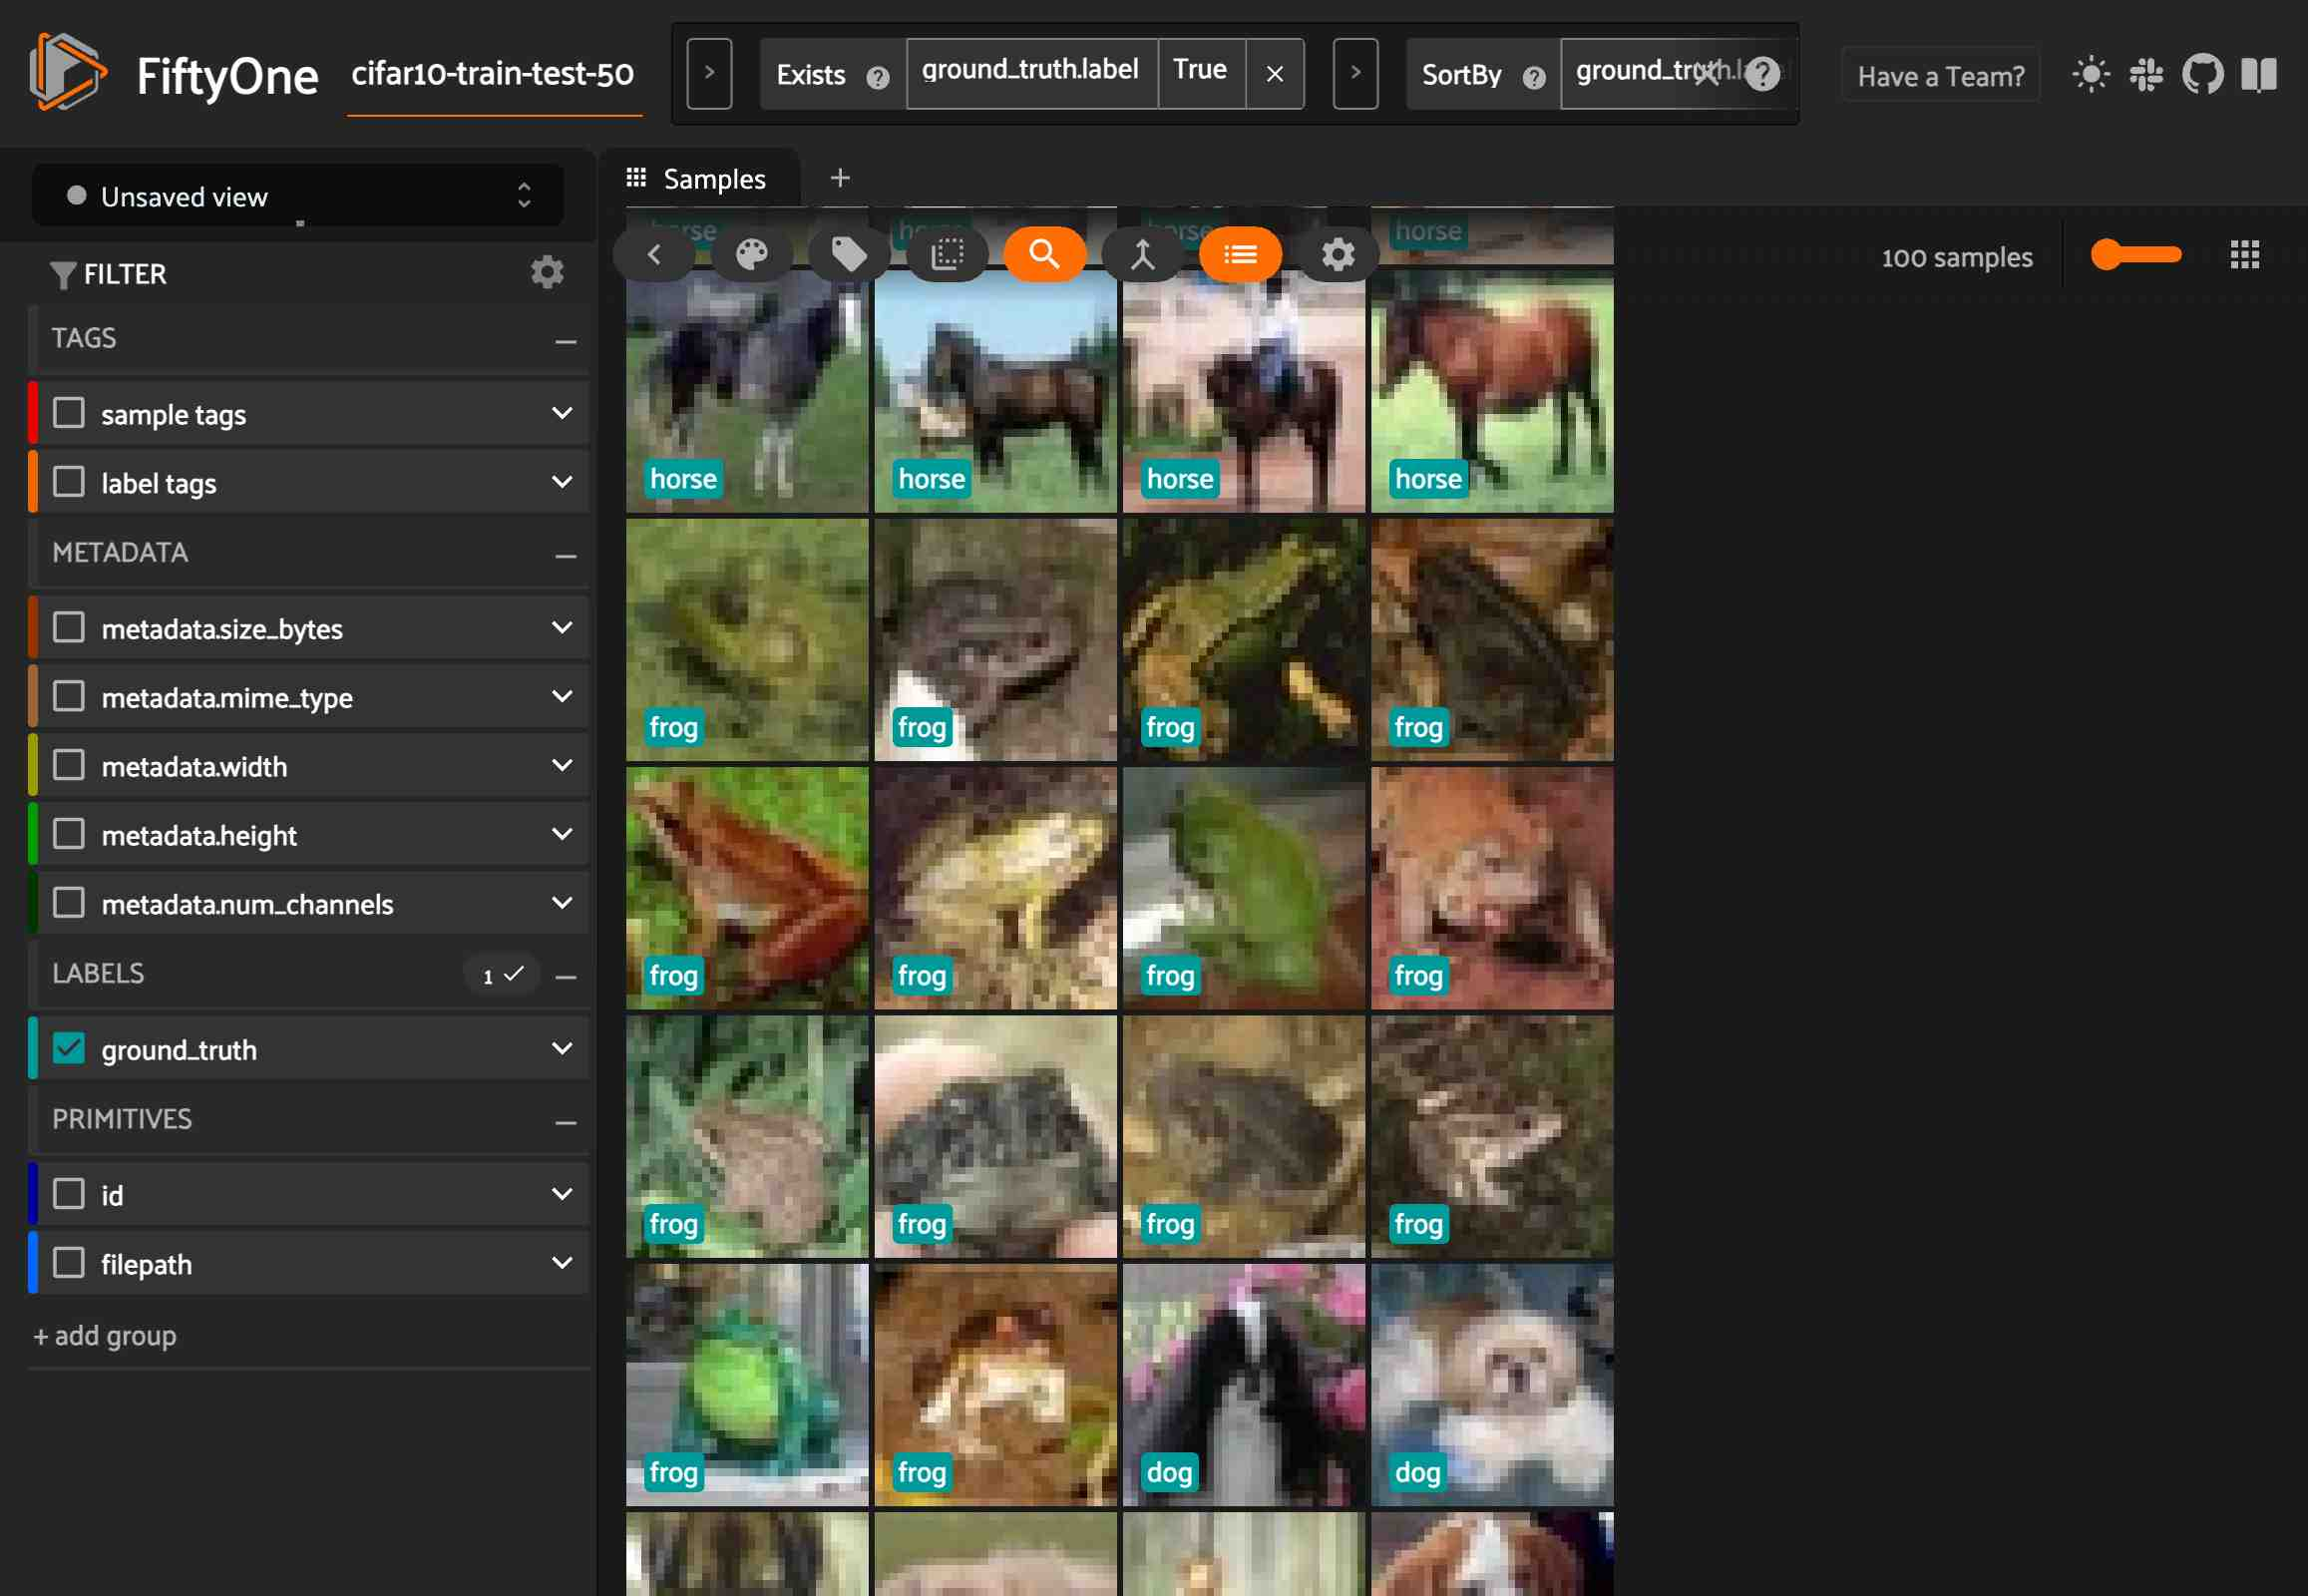

In [14]:
# sorting the labels
view = (
    ds
    .exists("ground_truth.label")
    .sort_by("ground_truth.label", reverse=True)
)

session.view = view

### Loading existing datasets

In [15]:
fo.list_datasets()

['2024.06.22.13.35.09',
 '2024.06.22.13.37.10',
 '2024.06.23.19.49.34',
 '2024.06.23.19.50.35',
 'FruitsRottenFresh_train',
 'cifar10',
 'cifar10-train-test-50',
 'coco-2017-test-1000',
 'coco-2017-train-10',
 'coco-2017-train-10000',
 'coco-2017-train-50',
 'coco-2017-train-validation-test-50',
 'coco-2017-validation-1000',
 'coco-2017-validation-sample',
 'detection-dataset',
 'fruits-rotten-fresh',
 'malaria-cell-images',
 'new-dataset',
 'toy-dataset']

In [17]:
ds2 = fo.load_dataset('new-dataset')

ds2

Name:        new-dataset
Media type:  image
Num samples: 11
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    uniqueness:   fiftyone.core.fields.FloatField

### Deleting a dataset (wuth caution)

In [18]:
ds2.delete()

In [19]:
fo.list_datasets()

['2024.06.22.13.35.09',
 '2024.06.22.13.37.10',
 '2024.06.23.19.49.34',
 '2024.06.23.19.50.35',
 'FruitsRottenFresh_train',
 'cifar10',
 'cifar10-train-test-50',
 'coco-2017-test-1000',
 'coco-2017-train-10',
 'coco-2017-train-10000',
 'coco-2017-train-50',
 'coco-2017-train-validation-test-50',
 'coco-2017-validation-1000',
 'coco-2017-validation-sample',
 'detection-dataset',
 'fruits-rotten-fresh',
 'malaria-cell-images',
 'toy-dataset']

## Creating a dataset from local images

In [21]:
fo.load_dataset("my-custom-dataset").delete()

In [23]:
# create a new dataset
ds = fo.Dataset("my-custom-dataset")

ds

Name:        my-custom-dataset
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)

In [24]:
# after creation, use load_dataset()

ds = fo.load_dataset("my-custom-dataset")
ds

Name:        my-custom-dataset
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)

#### Creating a new sample

In [25]:
image_path = "data/images/pic01.jpg"

sample = fo.Sample(filepath=image_path)
sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git_vmirly/udemy-image-recognition/section1/data/images/pic01.jpg',
    'tags': [],
    'metadata': None,
}>

#### Adding labels to the sample

In [27]:
import json

annot_file = "data/annotations/pic01.json"
with open(annot_file, "rt") as f:
    annot = json.load(f)

annot

{'filename': 'pic01.jpg',
 'width': 1024,
 'height': 1024,
 'results': [{'label': 'bird',
   'polygon': 'POLYGON ((0.6021246709747531 0.2616609757421573, 0.6336413209666665 0.2293362065196821, 0.6894015478754362 0.1808490526859693, 0.7734459478538718 0.1210482296243901, 0.832438651684889 0.1210482296243901, 0.8081950747680325 0.1832734103776549, 0.8938557132075919 0.1444836873106846, 0.9496159401163617 0.1315537796216946, 0.9665089899497047 0.1325711063239389, 0.9693934825436223 0.1405835857514881, 0.9514455286259123 0.1582110404920963, 0.9572145138137477 0.1639800256799317, 0.9488815352090965 0.1790434870037242, 0.9315745796455902 0.190901956556497, 0.9360615681250178 0.1963504425672304, 0.9267670919890607 0.2082089121200033, 0.9088191380713505 0.2197468824956741, 0.9088191380713505 0.2290413586316312, 0.8918326816849462 0.2389768331217921, 0.8972811676956796 0.2421818248928118, 0.8908711841536403 0.2511558018516669, 0.8774102187153576 0.260770777164726, 0.8652312499854828 0.265578264

#### Different types of labels / predictions

 * Classification (multi-class, multi-label)
 * Detection
 * Polylines (segmentation)
 

In [28]:
fo.Classification(label=annot["results"][0]["label"])

<Classification: {
    'id': '6678e40bcd4758d28fa2bafd',
    'tags': [],
    'label': 'bird',
    'confidence': None,
    'logits': None,
}>

In [29]:
cls = fo.Classification(label=annot["results"][0]["label"])
fo.Classifications(classifications=[cls])

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6678e424cd4758d28fa2bafe',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

In [30]:
cls = fo.Classification(label=annot["results"][0]["label"])

# for multi-class
# sample["ground_truth"] = cls

# for multi-label
sample["ground_truth"] = fo.Classifications(classifications=[cls])

sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git_vmirly/udemy-image-recognition/section1/data/images/pic01.jpg',
    'tags': [],
    'metadata': None,
    'ground_truth': <Classifications: {
        'classifications': [
            <Classification: {
                'id': '6678e47ecd4758d28fa2baff',
                'tags': [],
                'label': 'bird',
                'confidence': None,
                'logits': None,
            }>,
        ],
        'logits': None,
    }>,
}>

In [31]:
sample.ground_truth

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6678e47ecd4758d28fa2baff',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

In [32]:
sample["ground_truth"]

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6678e47ecd4758d28fa2baff',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

#### Adding samples to the dataset

In [33]:
images_dir = "data/images/"
annots_dir = "data/annotations/"

for filename in os.listdir(images_dir):
    if not filename.endswith(".jpg"):
        continue
    img_path = os.path.join(images_dir, filename)
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))
    annot = json.load(open(annot_path, "rt"))

    sample = fo.Sample(img_path)
    sample["ground_truth"] = fo.Classifications(
        classifications=[fo.Classification(label=res["label"]) for res in annot["results"]]
    )

    ds.add_sample(sample)

fo.pprint(ds.stats())

{
    'samples_count': 13,
    'samples_bytes': 4663,
    'samples_size': '4.6KB',
    'total_bytes': 4663,
    'total_size': '4.6KB',
}



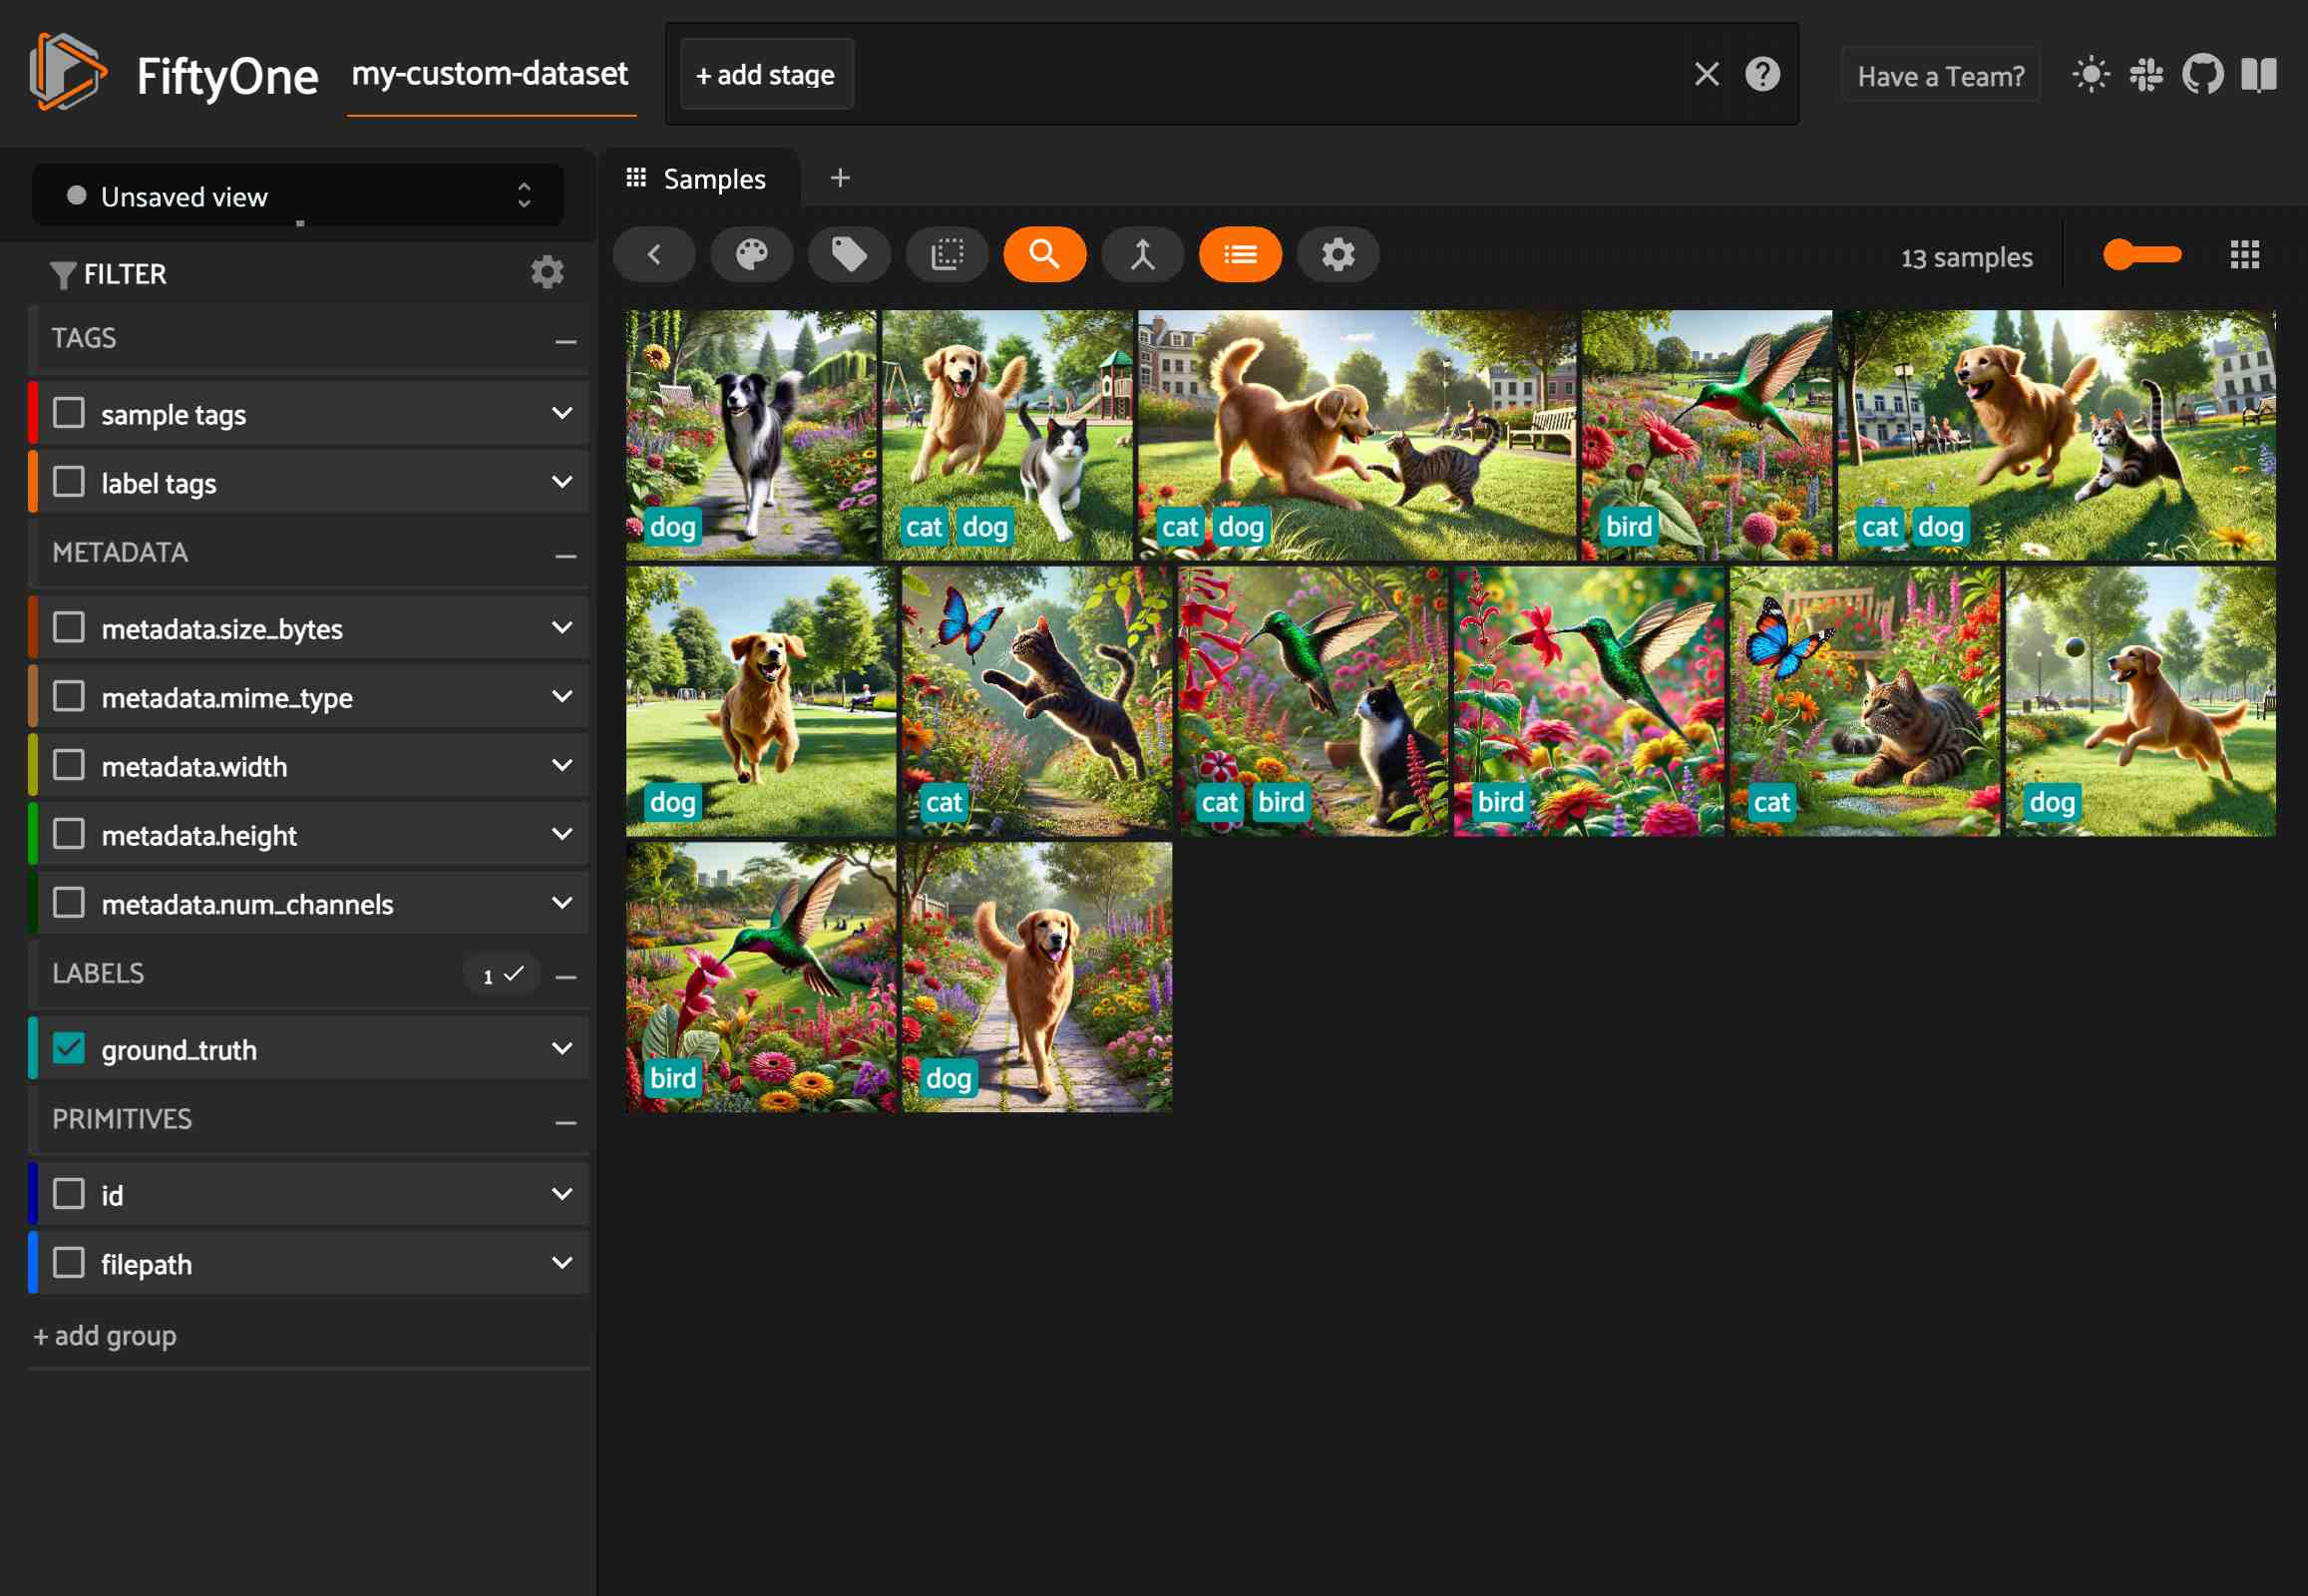

In [35]:
# visualize the dataset
# note: we already have a session
session.dataset = ds

### Bounding-box annotations

In [39]:
# create a new dataset

images_dir = "data/images"
annots_dir = "data/annotations/"

ds = fo.Dataset.from_images_dir(
    images_dir,
    name="my-detection-dataset"
)

fo.pprint(ds.stats())

 100% |███████████████████| 13/13 [16.6ms elapsed, 0s remaining, 780.9 samples/s]     
{
    'samples_count': 13,
    'samples_bytes': 2496,
    'samples_size': '2.4KB',
    'total_bytes': 2496,
    'total_size': '2.4KB',
}


In [40]:
from shapely import wkt

for sample in ds:
    filename = os.path.basename(sample["filepath"])
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    detections = []
    for res in annot["results"]:
        polygon = wkt.loads(res["polygon"])
        x1, y1, x2, y2 = polygon.bounds
        det = fo.Detection(
            label=res["label"],
            bounding_box=(x1, y1, x2-x1, y2-y1)  # fmt: xywh
        )
        detections.append(det)

    sample["ground_truth"] = fo.Detections(detections=detections)

    # save the sample to dataset
    sample.save()



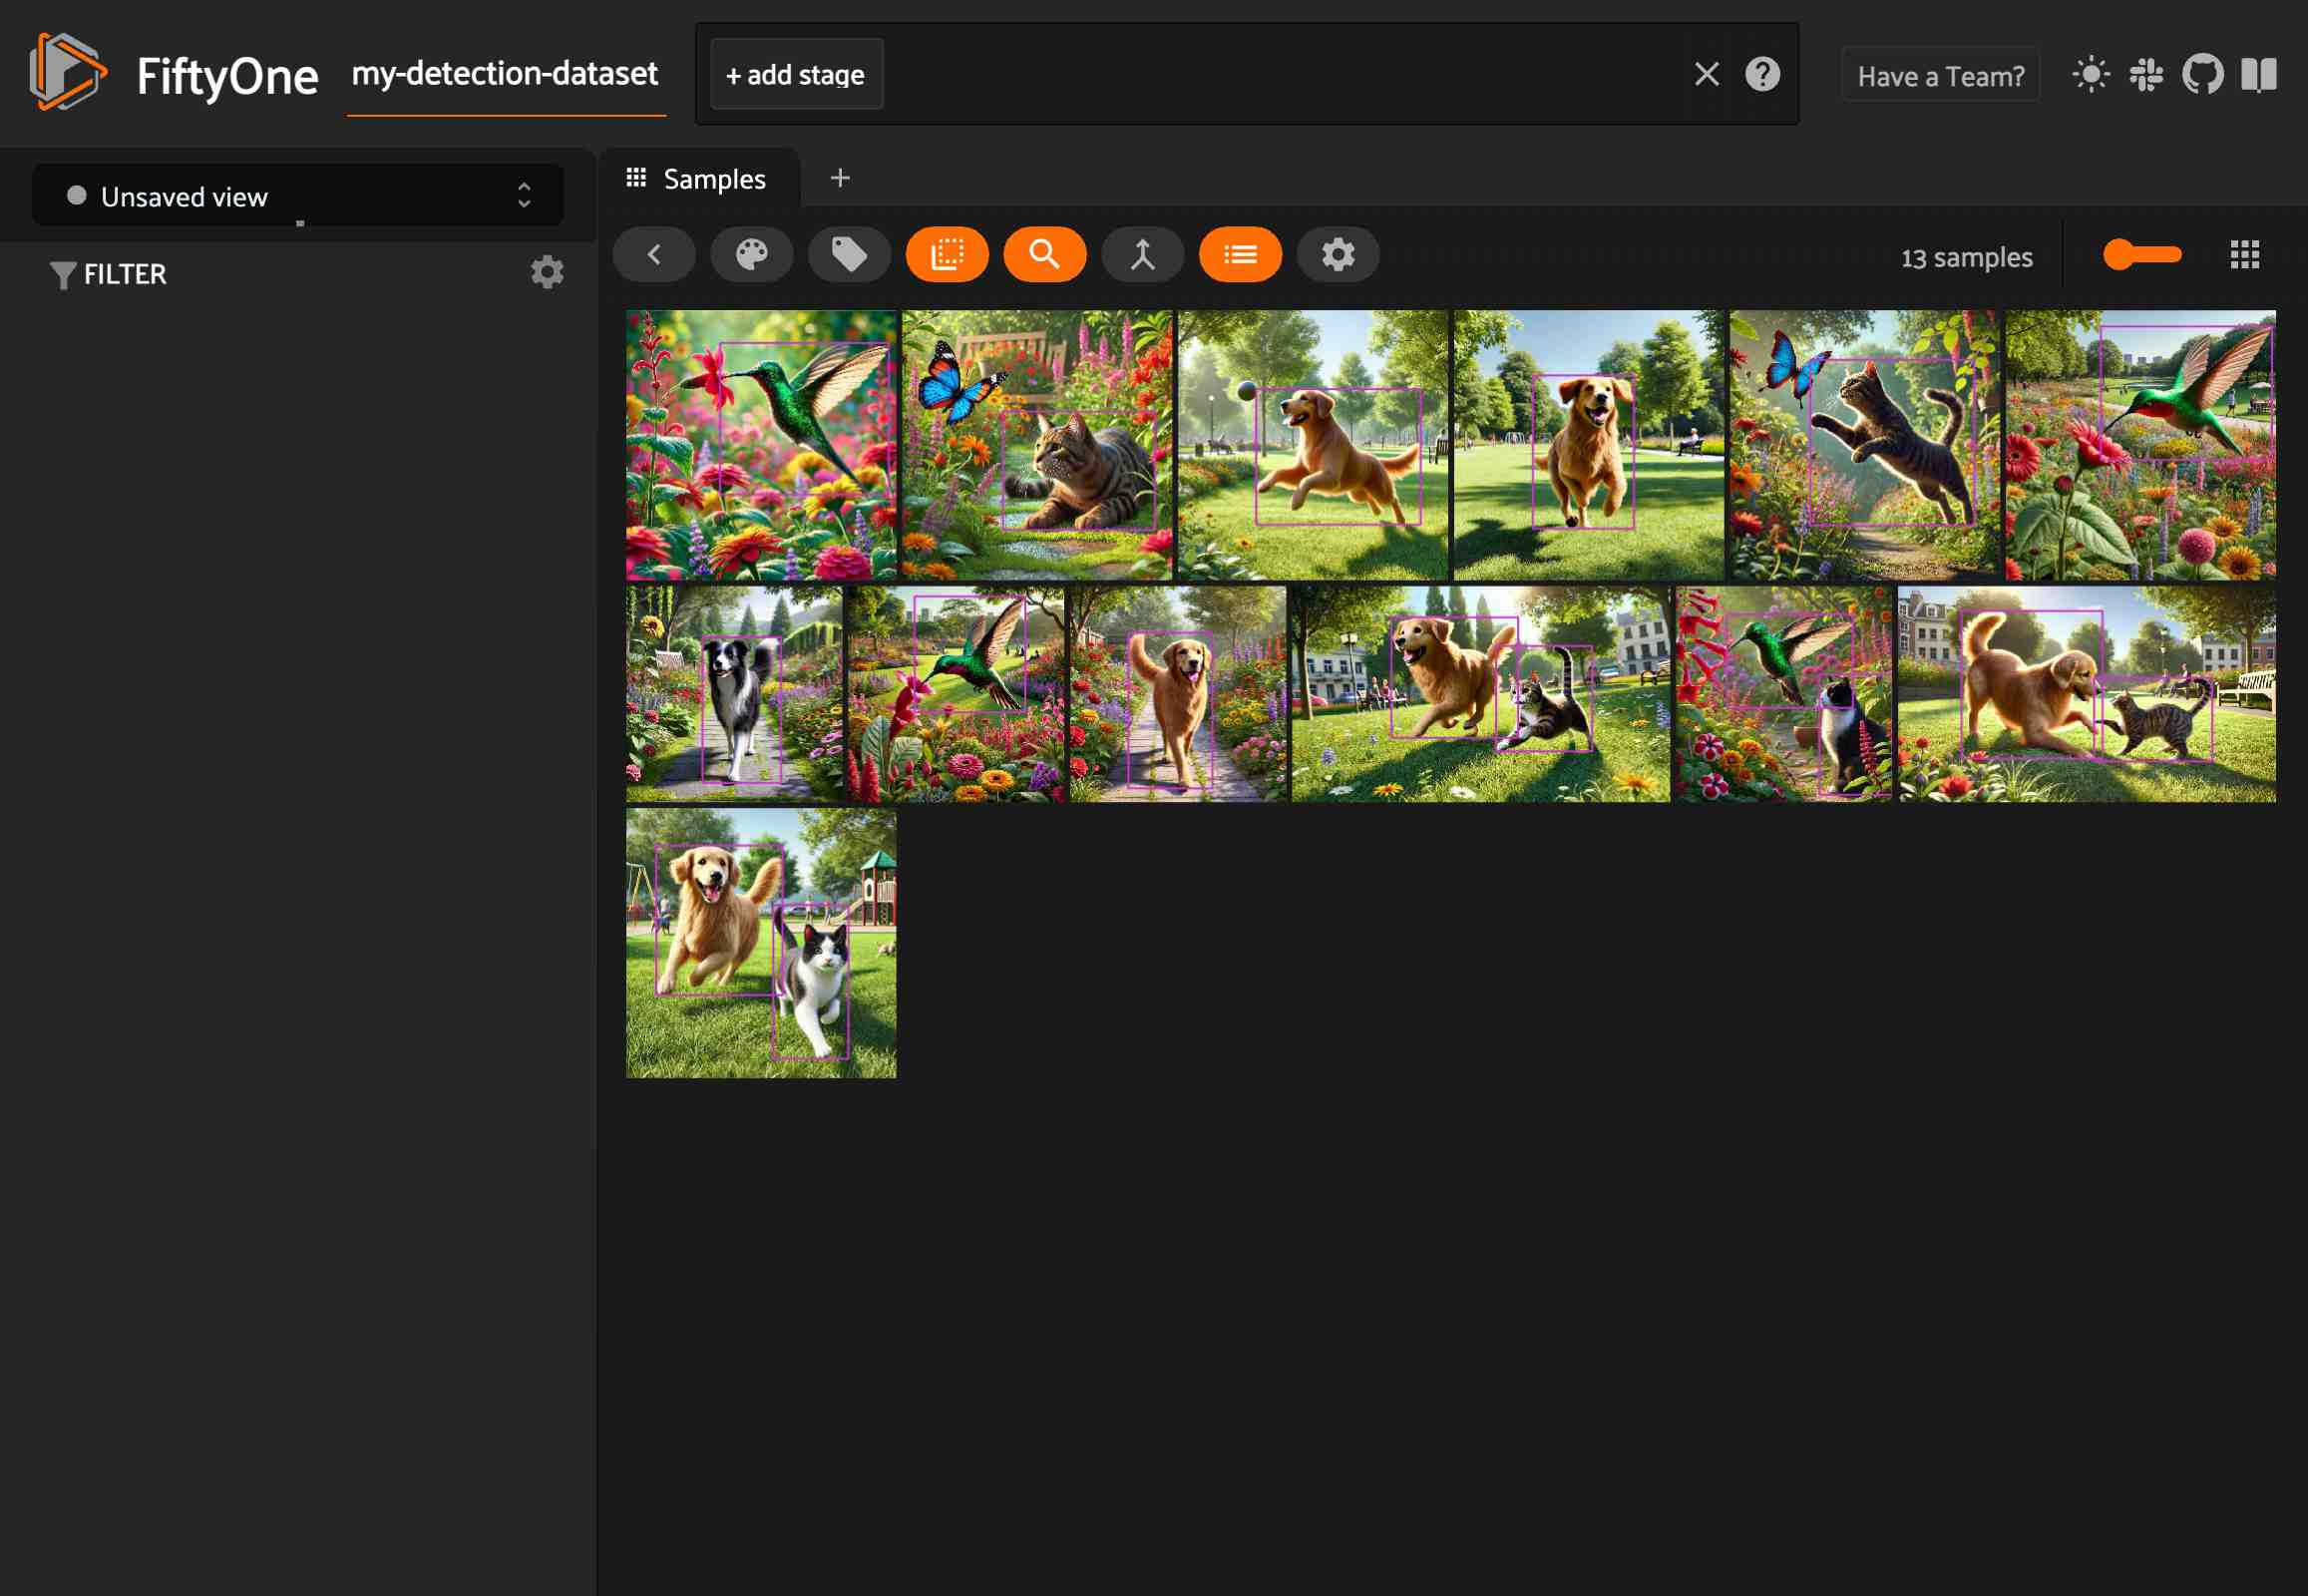

In [41]:
session.dataset = ds

#### Polyline labels

In [42]:
images_dir = "data/images"
annots_dir = "data/annotations/"

ds = fo.Dataset.from_images_dir(
    images_dir,
    name="my-segmentation-dataset"
)

 100% |███████████████████| 13/13 [11.3ms elapsed, 0s remaining, 1.2K samples/s]     


In [43]:

for sample in ds:
    filename = os.path.basename(sample["filepath"])
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    polylines = []
    for res in annot["results"]:
        polygon = wkt.loads(res["polygon"])
        poly = fo.Polyline(
            label=res["label"],
            points=[list(polygon.exterior.coords)],  #List[List[(x, y)]]
            closed=True
        )
        polylines.append(poly)

    sample["ground_truth"] = fo.Polylines(polylines=polylines)

    # save the sample to dataset
    sample.save()



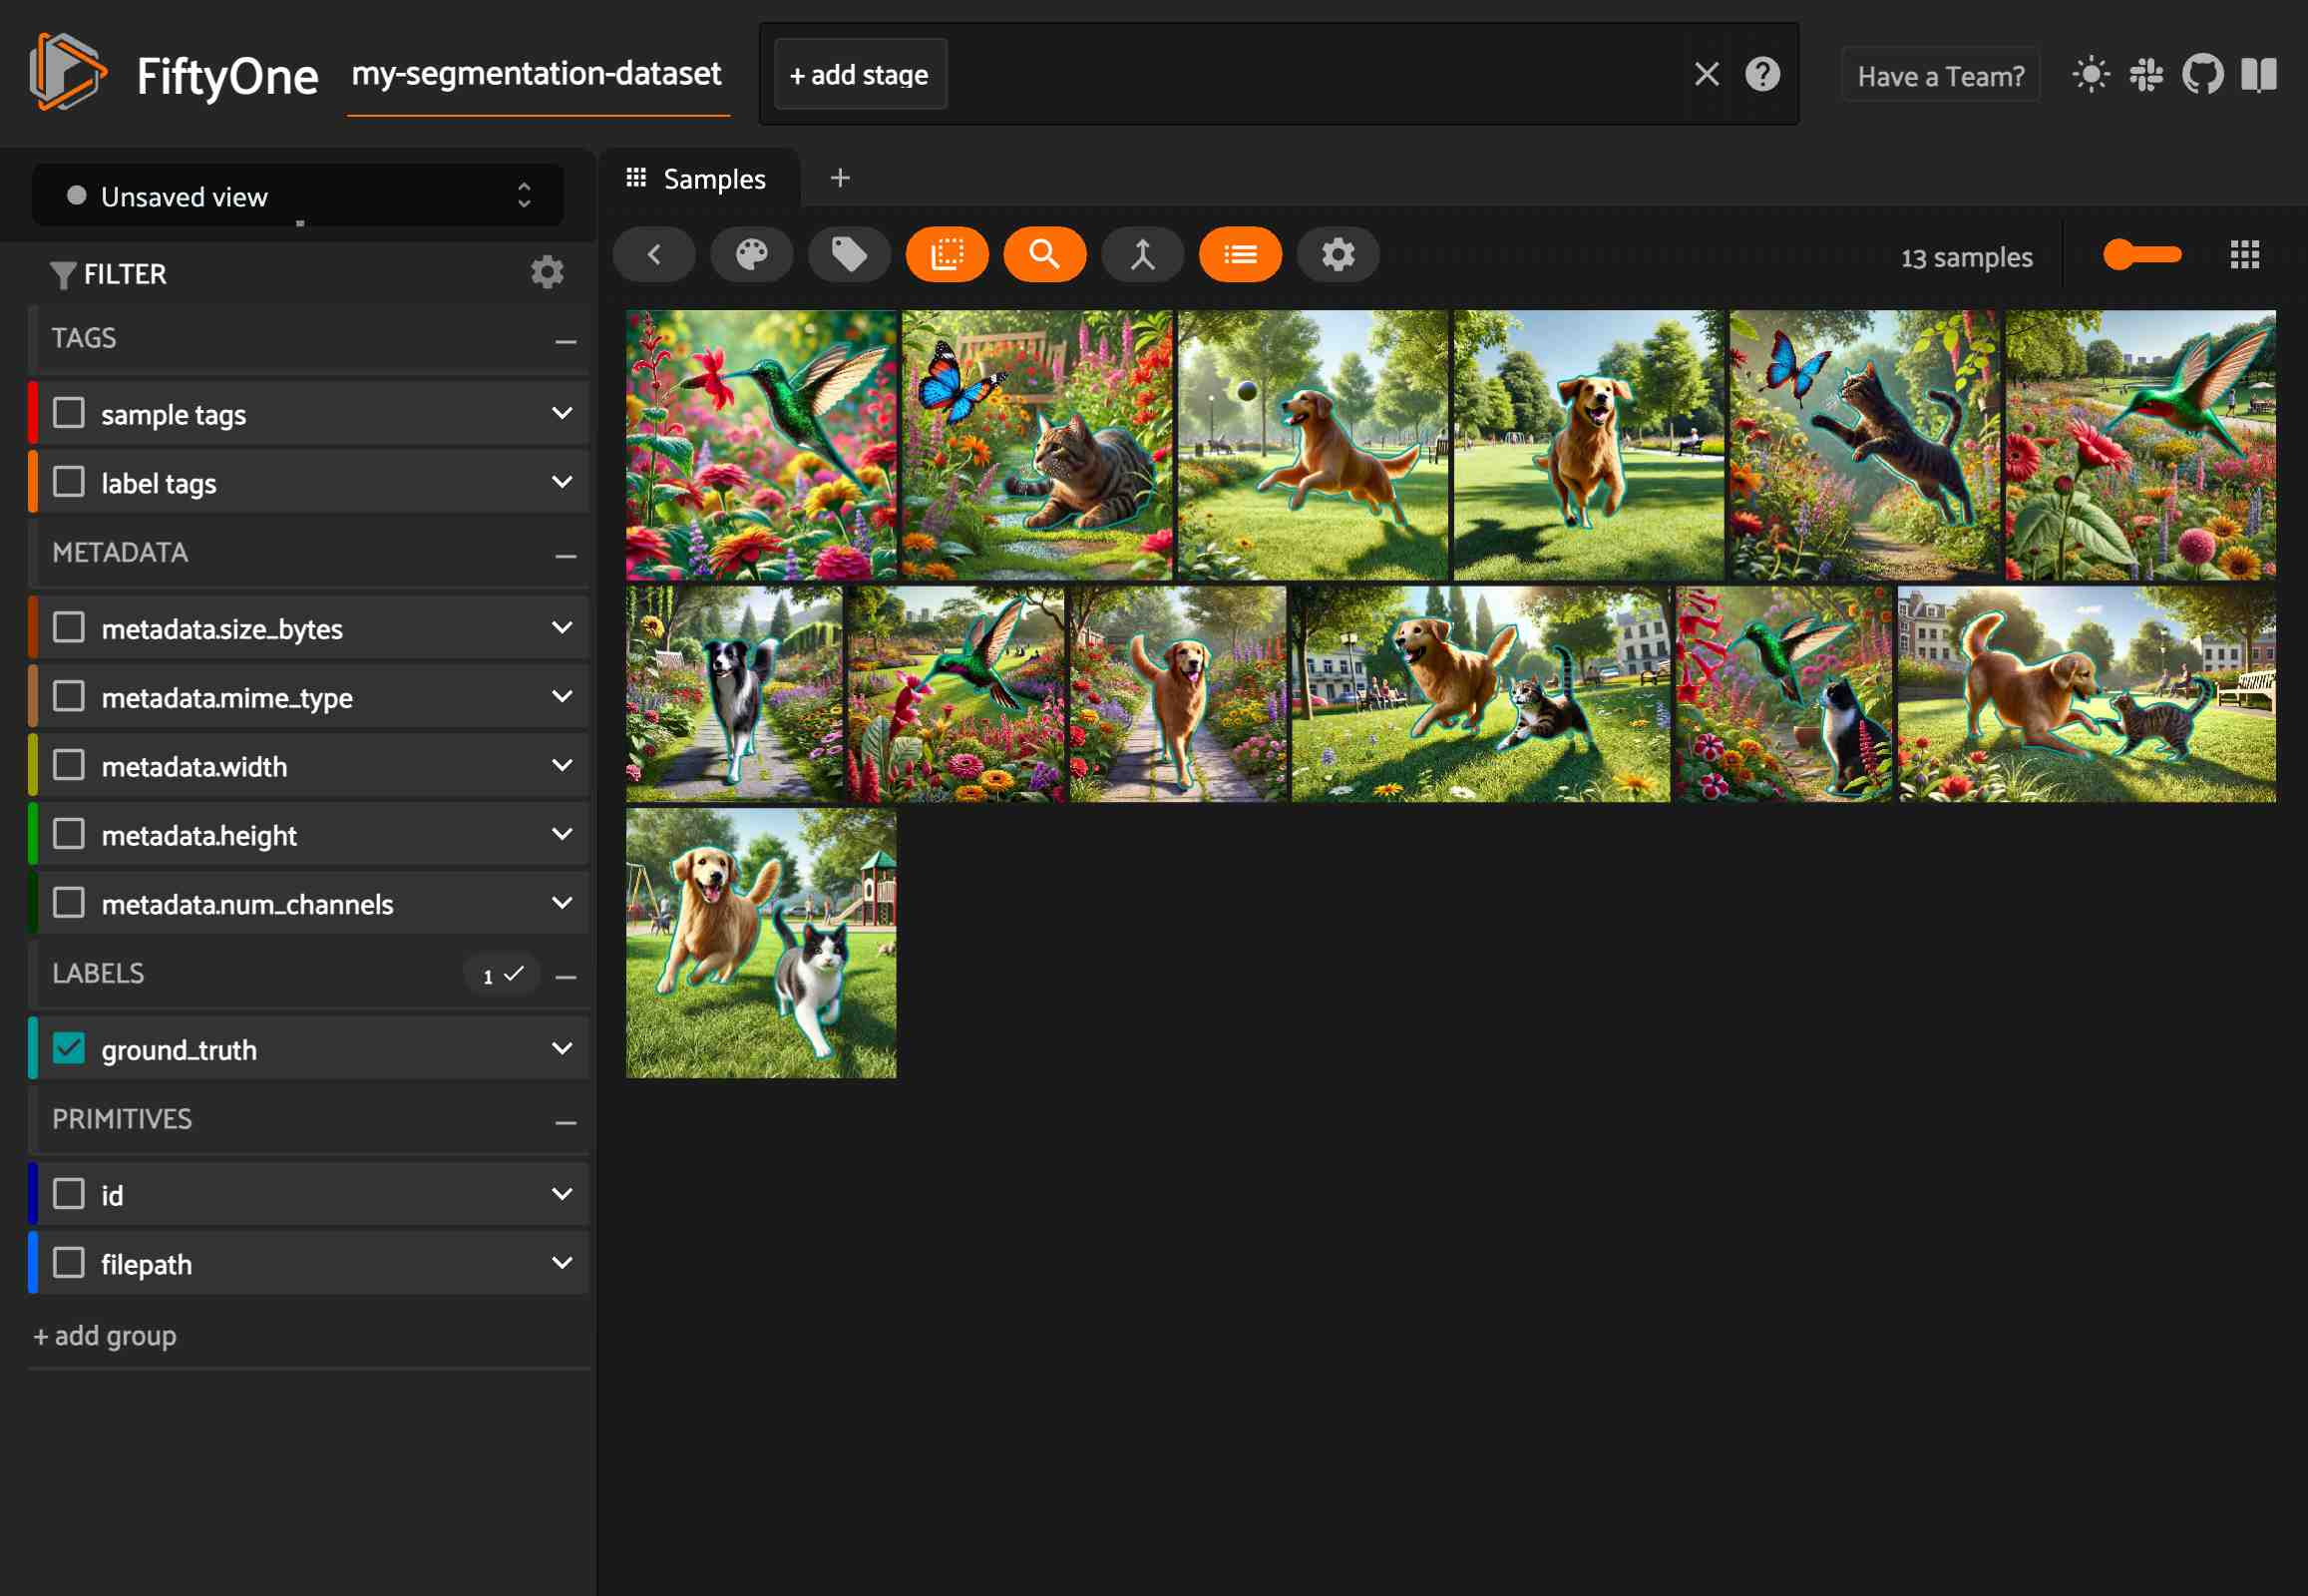

In [44]:
session.dataset = ds

### Filtering and selecting subsets of the dataset

##### A. Samples with just one object

9



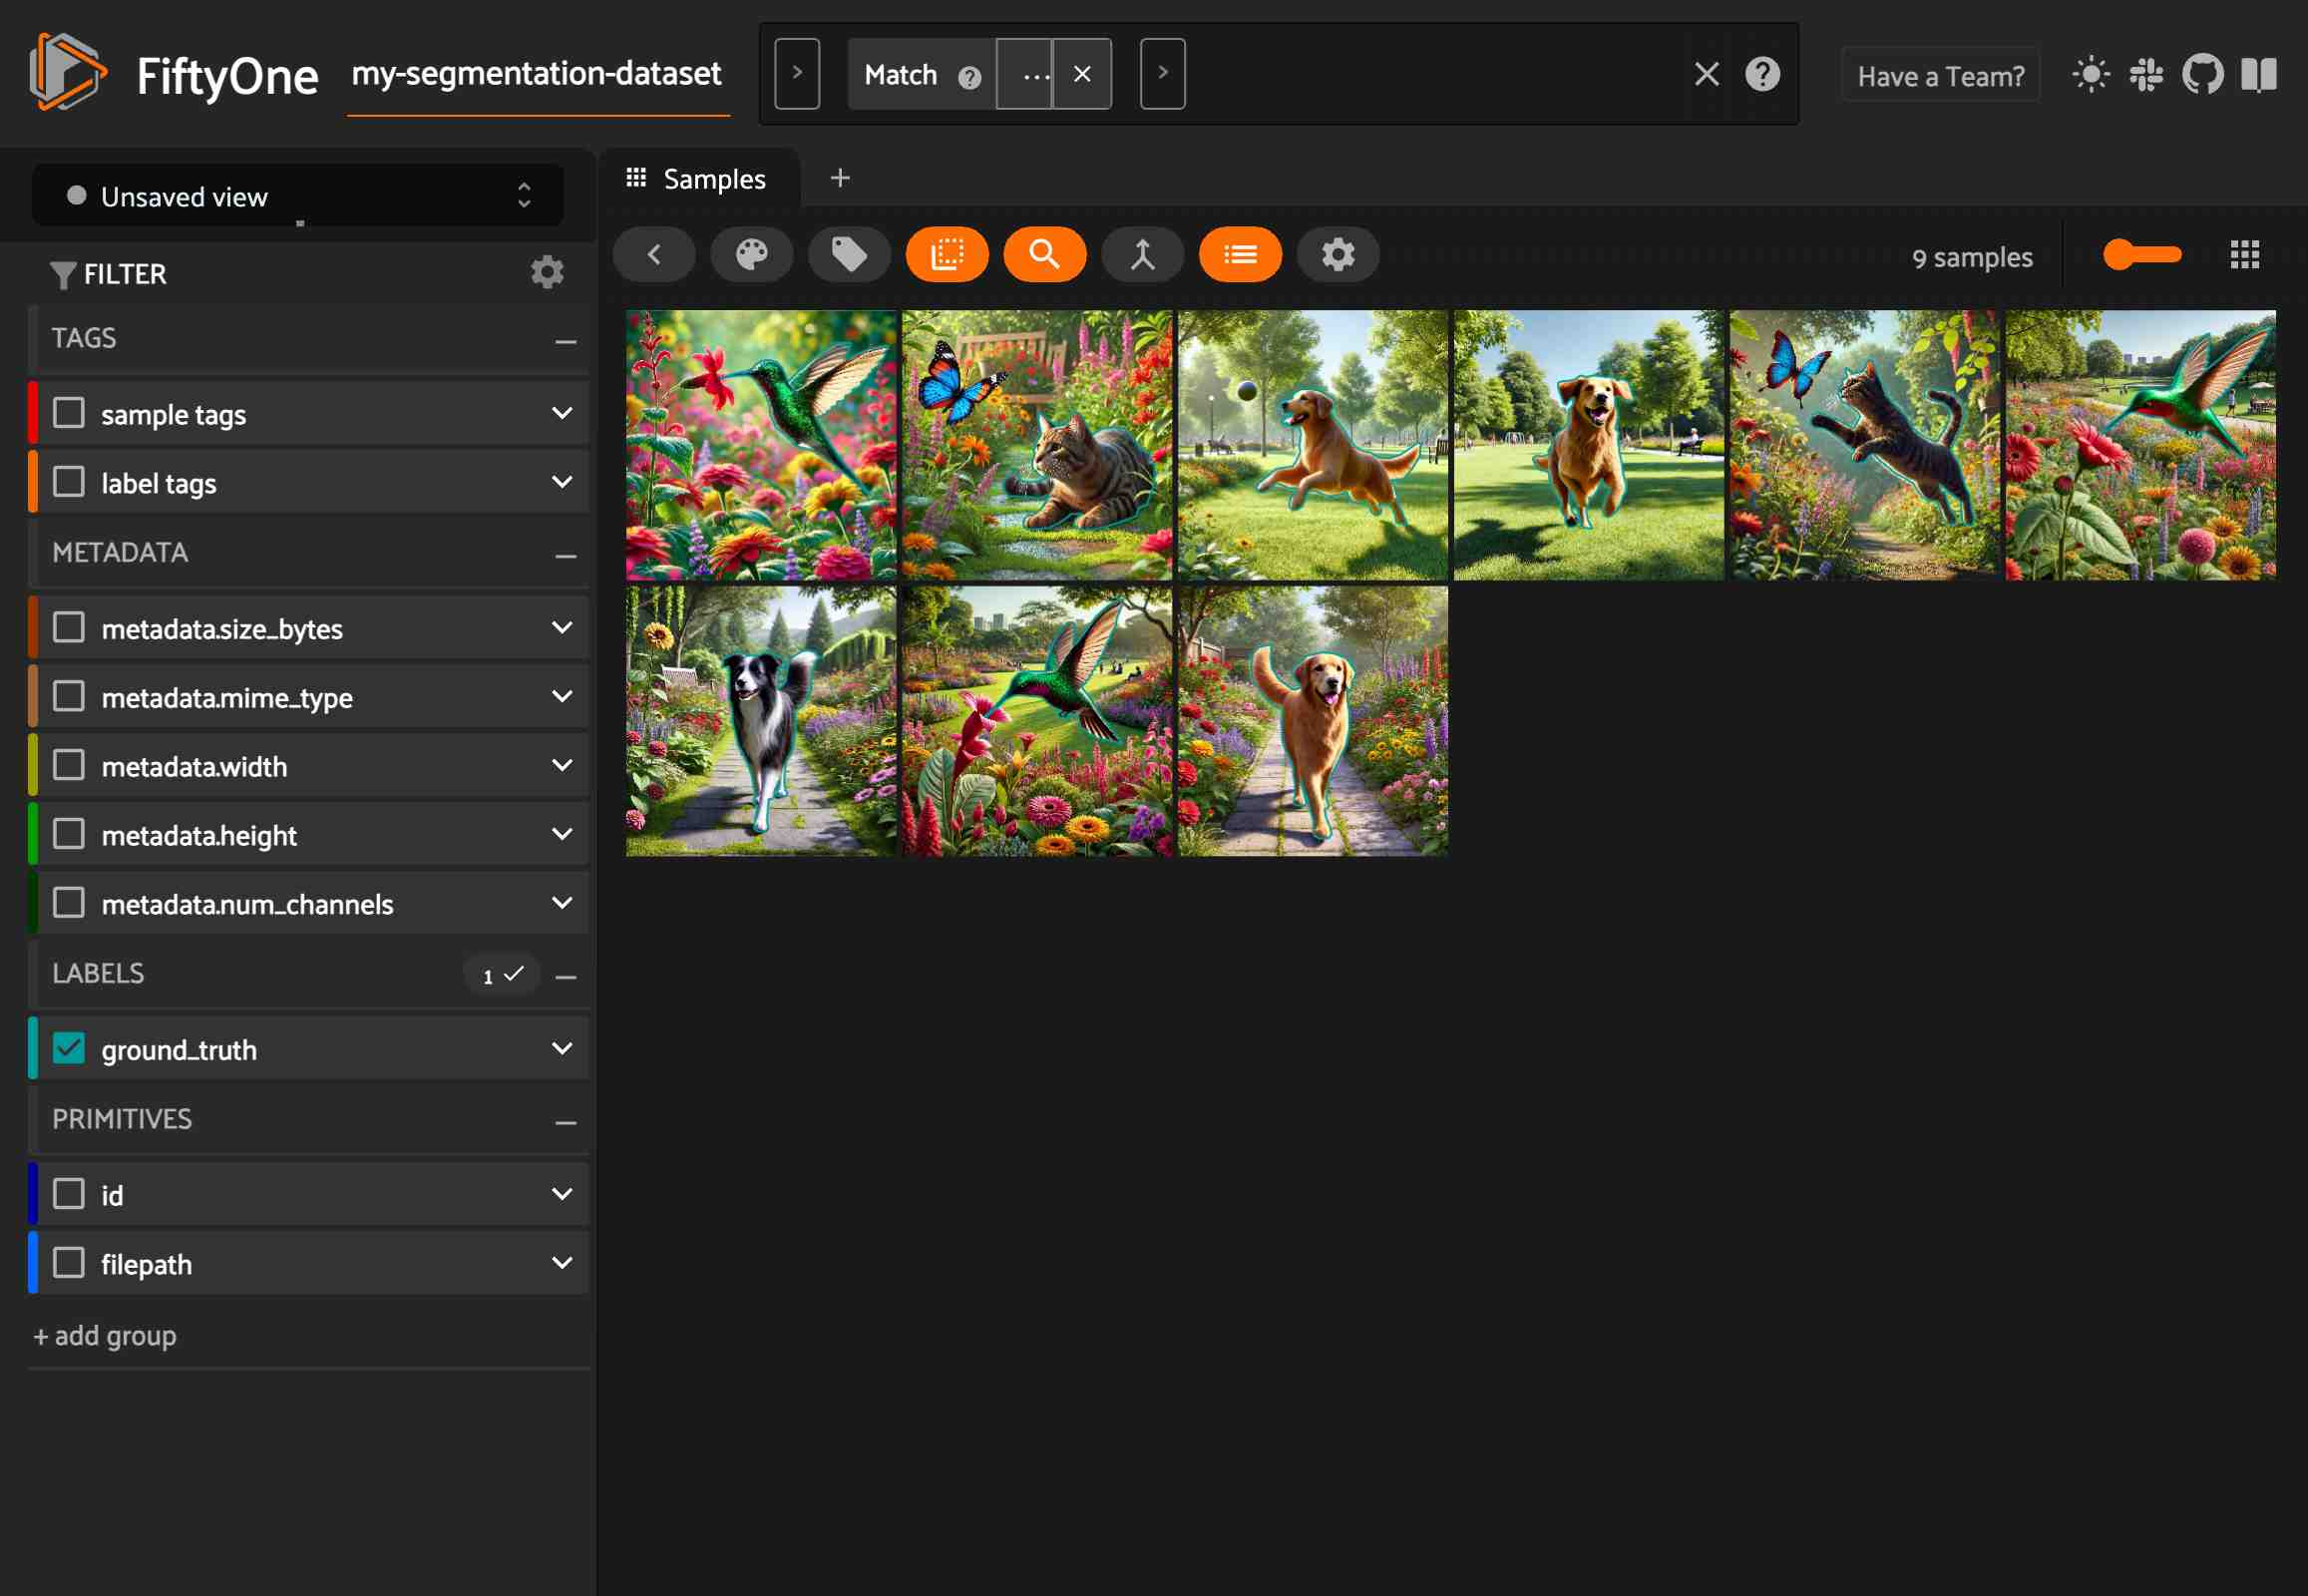

In [45]:
from fiftyone import ViewField as F

view = ds.match(F("ground_truth.polylines").length() == 1)
print(len(view))

session.view = view

##### B. Samples with more than 1 objects

In [46]:
view = ds.match(F("ground_truth.polylines").length() > 1)
print(len(view))

session.view = view

4


##### Cats and dogs 

In [47]:
view = ds.filter_labels(
    "ground_truth",
    F("label").is_in(["cat", "dog"])
)
view

Dataset:     my-segmentation-dataset
Media type:  image
Num samples: 10
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
View stages:
    1. FilterLabels(field='ground_truth', filter={'$in': ['$$this.label', [...]]}, only_matches=True, trajectories=False)